# Init & parsing

импорт

In [1]:
from collections import Counter

import numpy as np
import matplotlib.pyplot as plt

from application import *
from journal import Journal, JournalASU, jobs_to_df
from pre_processing import Job, Systems, Objects 
import statistics
%matplotlib inline


%load_ext autoreload
%autoreload 2

print('import complete')

import complete


парсинг файлов

In [2]:
%%time
jobs = []
jobs.extend(process_files(r'.\input data\SAKE', all_visible_sheets, works_parser.ParserSake))

print(len(jobs))

folder: .\input data\SAKE
 - 7.1.36.xlsx
 - 7.1.37-2.xlsx
 - 7.1.38.xlsx
 - 9.2.36.xlsx
 - 9.2.37-1.xlsx
 - 9.2.37-2.xlsx
 - 9.2.38.xlsx
 - 9.3.36.xlsx
 - 9.3.37-1.xlsx
 - 9.3.37-2.xlsx
 - 9.3.38.xlsx
 - 9.4.36.xlsx
 - 9.4.37-1.xlsx
 - 9.4.37-2.xlsx
 - 9.4.38.xlsx
 - АСУ ЛВС05.2020.xlsx
 - АСУ мост_05.2021.xlsx
 - АСУИС_05.2021.xlsx
 - АСУТП_05.2021.xlsx
654
Wall time: 19.4 s


генерация статистики

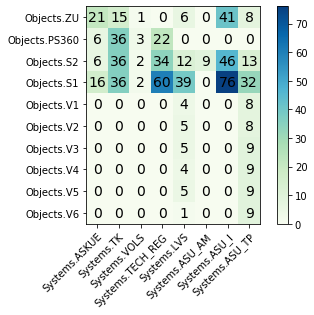

Systems.ASKUE    , Objects.ZU      - 21   
Systems.TK       , Objects.ZU      - 15   
Systems.VOLS     , Objects.ZU      - 1    
Systems.ASKUE    , Objects.PS360   - 6    
Systems.TECH_REG , Objects.PS360   - 22   
Systems.TK       , Objects.PS360   - 36   
Systems.VOLS     , Objects.PS360   - 3    
Systems.ASKUE    , Objects.S2      - 6    
Systems.TECH_REG , Objects.S2      - 34   
Systems.TK       , Objects.S2      - 36   
Systems.VOLS     , Objects.S2      - 2    
Systems.ASKUE    , Objects.S1      - 16   
Systems.TECH_REG , Objects.S1      - 60   
Systems.TK       , Objects.S1      - 36   
Systems.VOLS     , Objects.S1      - 2    
Systems.LVS      , Objects.V1      - 4    
Systems.LVS      , Objects.V2      - 5    
Systems.LVS      , Objects.S1      - 39   
Systems.LVS      , Objects.ZU      - 6    
Systems.LVS      , Objects.V3      - 5    
Systems.LVS      , Objects.S2      - 12   
Systems.LVS      , Objects.V4      - 4    
Systems.LVS      , Objects.V5      - 5    
Systems.LVS

In [3]:
stats = Counter((j.system, j.object)for j in jobs)    
# print(stats)

statistics.visualize_statistics(stats)

for (xlabel, ylabel), count in stats.items():
    print(f'{str(xlabel).ljust(17)}, {str(ylabel).ljust(15)} - {str(count).ljust(5)}')

# Tests

date test

In [4]:
dates = set((j.date.year, j.date.month) for j in jobs)
assert len(dates) == 1
print('test complete. ', dates)

test complete.  {(2021, 5)}


ASU test

In [7]:
assert stats[(Systems.ASU_TP, Objects.S1)] > 0
assert stats[(Systems.ASU_TP, Objects.S2)] > 0
assert stats[(Systems.ASU_TP, Objects.V1)] > 0
assert stats[(Systems.ASU_TP, Objects.V2)] > 0
assert stats[(Systems.ASU_TP, Objects.V3)] > 0
assert stats[(Systems.ASU_TP, Objects.V4)] > 0
assert stats[(Systems.ASU_TP, Objects.V5)] > 0
assert stats[(Systems.ASU_TP, Objects.V6)] > 0
# assert stats[(Systems.ASU_TP, Objects.ZU)] > 0

assert stats[(Systems.ASU_I, Objects.S1)] > 0
assert stats[(Systems.ASU_I, Objects.S2)] > 0
# assert stats[(Systems.ASU_I, Objects.ZU)] > 0

assert stats[(Systems.ASU_AM, Objects.S2)] > 0

assert stats[(Systems.LVS, Objects.S1)] > 0
assert stats[(Systems.LVS, Objects.S2)] > 0
assert stats[(Systems.LVS, Objects.V1)] > 0
assert stats[(Systems.LVS, Objects.V2)] > 0
assert stats[(Systems.LVS, Objects.V3)] > 0
assert stats[(Systems.LVS, Objects.V4)] > 0
assert stats[(Systems.LVS, Objects.V5)] > 0
assert stats[(Systems.LVS, Objects.V6)] > 0
# assert stats[(Systems.LVS, Objects.ZU)] > 0

print('all ASU/LVS tests is complete')

all ASU/LVS tests is complete


VOLS test

In [8]:
assert stats[(Systems.VOLS, Objects.ZU)] > 0
assert stats[(Systems.VOLS, Objects.PS360)] > 0
assert stats[(Systems.VOLS, Objects.S2)] > 0
assert stats[(Systems.VOLS, Objects.S1)] > 0

print('all VOLS tests is complete')

all VOLS tests is complete


TK test

In [9]:
assert stats[(Systems.TK, Objects.ZU)] > 0
assert stats[(Systems.TK, Objects.PS360)] > 0
assert stats[(Systems.TK, Objects.S2)] > 0
assert stats[(Systems.TK, Objects.S1)] > 0

print('all TK tests is complete')

all TK tests is complete


ASKUE test

In [10]:
assert stats[(Systems.ASKUE, Objects.ZU)] > 0
assert stats[(Systems.ASKUE, Objects.PS360)] > 0
# assert stats[(Systems.ASKUE, Objects.PS223)] > 0
assert stats[(Systems.ASKUE, Objects.S2)] > 0
assert stats[(Systems.ASKUE, Objects.S1)] > 0

print('all ASKUE tests is complete')

all ASKUE tests is complete


TECH_REG test

In [11]:
assert stats[(Systems.TECH_REG, Objects.PS360)] > 0
assert stats[(Systems.TECH_REG, Objects.S2)] > 0
assert stats[(Systems.TECH_REG, Objects.S1)] > 0
print('all TECH_REG tests is complete')

all TECH_REG tests is complete


# Plans generator

In [12]:
make_xlsx_from_jobs(jobs)

Генерация планов работ
 - .\output data\plans\2021 05 01.xlsx
 - .\output data\plans\2021 05 02.xlsx
 - .\output data\plans\2021 05 03.xlsx
 - .\output data\plans\2021 05 04.xlsx
 - .\output data\plans\2021 05 05.xlsx
 - .\output data\plans\2021 05 06.xlsx
 - .\output data\plans\2021 05 07.xlsx
 - .\output data\plans\2021 05 08.xlsx
 - .\output data\plans\2021 05 09.xlsx
 - .\output data\plans\2021 05 10.xlsx
 - .\output data\plans\2021 05 11.xlsx
 - .\output data\plans\2021 05 12.xlsx
 - .\output data\plans\2021 05 13.xlsx
 - .\output data\plans\2021 05 14.xlsx
 - .\output data\plans\2021 05 15.xlsx
 - .\output data\plans\2021 05 16.xlsx
 - .\output data\plans\2021 05 17.xlsx
 - .\output data\plans\2021 05 18.xlsx
 - .\output data\plans\2021 05 19.xlsx
 - .\output data\plans\2021 05 20.xlsx
 - .\output data\plans\2021 05 21.xlsx
 - .\output data\plans\2021 05 22.xlsx
 - .\output data\plans\2021 05 23.xlsx
 - .\output data\plans\2021 05 24.xlsx
 - .\output data\plans\2021 05 25.xlsx
 -

# Journals generator

In [13]:
from journal import Journal, JournalASU, JournalASKUE, jobs_to_df, batch_journal_generator
from config_journals import batch_ASU_journals, batch_ASKUE_journals
print('import complete')

import complete


генерация датафрейма

In [14]:
df_jobs = jobs_to_df(jobs)
print('ok')

ok


генерация журналов АСУ

In [15]:
batch_journal_generator(df_jobs, JournalASU, batch_ASU_journals)

{'АСУ ТП С1 Север': <journal.JournalASU at 0xd94a070>,
 'АСУ ТП С1 Юг': <journal.JournalASU at 0xde5efd0>,
 'АСУ ТП С2 Север': <journal.JournalASU at 0xd7c98f0>,
 'АСУ ТП С2 Юг': <journal.JournalASU at 0xd94ab30>,
 'АСУ ТП В1': <journal.JournalASU at 0xd9b4030>,
 'АСУ ТП В2': <journal.JournalASU at 0x5bd7cb0>,
 'АСУ ТП В3': <journal.JournalASU at 0x5bd7ad0>,
 'АСУ ТП В4': <journal.JournalASU at 0xa6f6a50>,
 'АСУ ТП В5': <journal.JournalASU at 0xd94ae70>,
 'АСУ ТП В6': <journal.JournalASU at 0xdf118d0>,
 'АСУ ТП ЗУ': <journal.JournalASU at 0xa6e1d30>,
 'АСУ АМ С2': <journal.JournalASU at 0xde5bfb0>,
 'АСУ И С1 Север': <journal.JournalASU at 0x5bfb550>,
 'АСУ И С1 Юг': <journal.JournalASU at 0xdf11870>,
 'АСУ И С2 Север': <journal.JournalASU at 0xdff5610>,
 'АСУ И С2 Юг': <journal.JournalASU at 0xdeb3290>,
 'АСУ И ЗУ': <journal.JournalASU at 0xe09ef90>,
 'ВОЛС': <journal.JournalASU at 0xe09e210>,
 'ТК М2': <journal.JournalASU at 0xdf03af0>}

генерация журналов АИИСКУЕ

In [16]:
batch_journal_generator(df_jobs, JournalASKUE, batch_ASKUE_journals)

{'АИИСКУЕ': <journal.JournalASKUE at 0xdd2a310>,
 'Тех Учет': <journal.JournalASKUE at 0xd9b0db0>,
 'ЛВС': <journal.JournalASKUE at 0xdf116d0>}

## calendars

In [51]:
from work_calendar import batch_make_calendars

batch_make_calendars(df_jobs)

В1-В6
C1
C2
Энергетика
Оптика


c:\users\mihail\pycharmprojects\work plan generator\venv\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


## email sending

In [17]:
import config_email, email_processing
import os
from application import get_xlsx_files


In [19]:
email_processing.send_journals(config_email.batch_sending_journals, 
                               attachment_folder=r'./output data/journals/', 
                               mail_subj='журналы работ', 
                               add_month_to_subj= True, test_mod=False)

email subject: журналы работ Май 
NMulin@bcc.ru        ['./output data/journals/2021 05 АСУ И С1 Север.xlsx', './output data/journals/2021 05 АСУ И С1 Юг.xlsx', './output data/journals/2021 05 АСУ ТП С1 Север.xlsx', './output data/journals/2021 05 АСУ ТП С1 Юг.xlsx']
VMakarov@bcc.ru      ['./output data/journals/2021 05 АСУ АМ С2.xlsx', './output data/journals/2021 05 АСУ И ЗУ.xlsx', './output data/journals/2021 05 АСУ И С2 Север.xlsx', './output data/journals/2021 05 АСУ И С2 Юг.xlsx', './output data/journals/2021 05 АСУ ТП ЗУ.xlsx', './output data/journals/2021 05 АСУ ТП С2 Север.xlsx', './output data/journals/2021 05 АСУ ТП С2 Юг.xlsx']
MKokoev@bcc.ru       ['./output data/journals/2021 05 АСУ ТП В1.xlsx', './output data/journals/2021 05 АСУ ТП В2.xlsx', './output data/journals/2021 05 АСУ ТП В3.xlsx', './output data/journals/2021 05 АСУ ТП В4.xlsx', './output data/journals/2021 05 АСУ ТП В5.xlsx', './output data/journals/2021 05 АСУ ТП В6.xlsx']
APodolskij@bcc.ru    ['./output data

In [ ]:
email_processing.send_journals(config_email.batch_sending_plans, 
                               attachment_folder=r'./output data/plans/', 
                               mail_subj='планы работ', 
                               add_month_to_subj= True, test_mod=False)

In [65]:
email_processing.send_journals(config_email.batch_sending_calendars, 
                               attachment_folder=r'./output data/calendars/', 
                               mail_subj='календарь работ', 
                               add_month_to_subj= True, test_mod=False)


email subject: календарь работ Май 
MKokoev@bcc.ru       ['./output data/calendars/2021 05 Календарь работ В1-В6.xlsx']
APodolskij@bcc.ru    ['./output data/calendars/2021 05 Календарь работ В1-В6.xlsx']


# Sandbox

True

In [10]:
from work_calendar import calendar_pivot_table, make_calendar
calendar_pivot_table(df_jobs, description)




,date,system,object,place,work_type,tech_map,equip_name,performer
0,2021-04-01,Systems.ASKUE,Objects.ZU,Здание управления КЗС,ЕТО,Технологическая карта №9,дистанционный контроль,Ястребов Алексей Владимирович +79313581975
1,2021-04-02,Systems.ASKUE,Objects.ZU,Здание управления КЗС,ЕТО,Технологическая карта №9,дистанционный контроль,Ястребов Алексей Владимирович +79313581975
2,2021-04-05,Systems.ASKUE,Objects.ZU,Здание управления КЗС,ЕТО,Технологическая карта №9,дистанционный контроль,Ильин Андрей Владимирович +79219303652
3,2021-04-06,Systems.ASKUE,Objects.ZU,Здание управления КЗС,ЕТО,Технологическая карта №9,дистанционный контроль,Ильин Андрей Владимирович +79219303652
4,2021-04-07,Systems.ASKUE,Objects.ZU,Здание управления КЗС,ЕТО,Технологическая карта №9,дистанционный контроль,Ильин Андрей Владимирович +79219303652
...,...,...,...,...,...,...,...,...
533,2021-04-12,Systems.ASU_TP,Objects.V6,Водопропускное сооружение В6,ТО1,Технологическая карта 02/В6/2/2016,ПТК В6,Подольский Андрей Вениаминович +79312531066
534,2021-04-19,Systems.ASU_TP,Objects.V6,Водопропускное сооружение В6,ТО1,Технологическая карта 02/В6/2/2016,ПТК В6,Подольский Андрей Вениаминович +79312531066
535,2021-04-30,Systems.ASU_TP,Objects.V6,Водопропускное сооружение В6,ТО1,Технологическая карта 02/В6/2/2016,ПТК В6,Кокоев Михаил Николаевич +79216441993
536,2021-04-22,Systems.ASU_TP,Objects.V6,Водопропускное сооружение В6,ТО2,Технологическая карта 03/В6/2/2016,ПТК В6,Кокоев Михаил Николаевич +79216441993


In [48]:
dfs = df_jobs.groupby(df_jobs.system, sort=False)

In [51]:
dfs.get_group(Systems.ASKUE)

,date,system,object,place,work_type,tech_map,equip_name,performer
0,2021-04-01,Systems.ASKUE,Objects.ZU,Здание управления КЗС,ЕТО,Технологическая карта №9,дистанционный контроль,Ястребов Алексей Владимирович +79313581975
1,2021-04-02,Systems.ASKUE,Objects.ZU,Здание управления КЗС,ЕТО,Технологическая карта №9,дистанционный контроль,Ястребов Алексей Владимирович +79313581975
2,2021-04-05,Systems.ASKUE,Objects.ZU,Здание управления КЗС,ЕТО,Технологическая карта №9,дистанционный контроль,Ильин Андрей Владимирович +79219303652
3,2021-04-06,Systems.ASKUE,Objects.ZU,Здание управления КЗС,ЕТО,Технологическая карта №9,дистанционный контроль,Ильин Андрей Владимирович +79219303652
4,2021-04-07,Systems.ASKUE,Objects.ZU,Здание управления КЗС,ЕТО,Технологическая карта №9,дистанционный контроль,Ильин Андрей Владимирович +79219303652
5,2021-04-08,Systems.ASKUE,Objects.ZU,Здание управления КЗС,ЕТО,Технологическая карта №9,дистанционный контроль,Ястребов Алексей Владимирович +79313581975
6,2021-04-09,Systems.ASKUE,Objects.ZU,Здание управления КЗС,ЕТО,Технологическая карта №9,дистанционный контроль,Ястребов Алексей Владимирович +79313581975
7,2021-04-12,Systems.ASKUE,Objects.ZU,Здание управления КЗС,ЕТО,Технологическая карта №9,дистанционный контроль,Ястребов Алексей Владимирович +79313581975
8,2021-04-13,Systems.ASKUE,Objects.ZU,Здание управления КЗС,ЕТО,Технологическая карта №9,дистанционный контроль,Ильин Андрей Владимирович +79219303652
9,2021-04-14,Systems.ASKUE,Objects.ZU,Здание управления КЗС,ЕТО,Технологическая карта №9,дистанционный контроль,Ильин Андрей Владимирович +79219303652


In [168]:
works_calendar = df_jobs[df_jobs.object.isin(
                [Objects.V1, Objects.V2, Objects.V3,
                 Objects.V4, Objects.V5, Objects.V6])]\
        [df_jobs.system == Systems.ASU_TP]\
        [['date', 'place', 'work_type']]
# works_calendar.object = works_calendar.object.apply(lambda i: i.value)
works_calendar = works_calendar.pivot_table(values='work_type', index='place',
                                            columns='date', aggfunc = lambda x: ', '.join(x))
works_calendar

c:\users\mihail\pycharmprojects\work plan generator\venv\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


date,2021-04-05,2021-04-06,2021-04-07,2021-04-12,2021-04-13,2021-04-14,2021-04-19,2021-04-20,2021-04-21,2021-04-22,2021-04-23,2021-04-26,2021-04-27,2021-04-28,2021-04-29,2021-04-30
place,,,,,,,,,,,,,,,,
Водопропускное сооружение В1,NaN,NaN,ТО1,NaN,NaN,ТО1,NaN,NaN,ТО1,NaN,NaN,ТО1,NaN,NaN,ТО2,ТО2
Водопропускное сооружение В2,NaN,NaN,ТО1,NaN,NaN,ТО1,NaN,NaN,ТО1,NaN,NaN,ТО1,NaN,NaN,ТО2,ТО2
Водопропускное сооружение В3,NaN,ТО1,NaN,NaN,ТО1,NaN,NaN,ТО1,NaN,NaN,NaN,NaN,ТО2,ТО2,NaN,ТО1
Водопропускное сооружение В4,NaN,ТО1,NaN,NaN,ТО1,NaN,NaN,ТО1,NaN,NaN,NaN,NaN,ТО2,ТО2,NaN,ТО1
Водопропускное сооружение В5,ТО1,NaN,NaN,ТО1,NaN,NaN,ТО1,NaN,NaN,ТО2,ТО2,NaN,NaN,NaN,NaN,ТО1
Водопропускное сооружение В6,ТО1,NaN,NaN,ТО1,NaN,NaN,ТО1,NaN,NaN,ТО2,ТО2,NaN,NaN,NaN,NaN,ТО1


In [162]:
from openpyxl.utils import get_column_letter
name = 'Календарь работ В1-В6'
with pd.ExcelWriter(path=r'output data/'+name+'.xlsx', date_format='DD.MM', datetime_format='DD.MM') as writer:
    sheet_name = 'Sheet1'
    works_calendar.to_excel(writer, sheet_name)
    ws = writer.sheets[sheet_name]
    ws.cell(row=1, column=1).value = name
    ws.cell(row=2, column=1).value = ''
    ws.delete_rows(3)
    ws.column_dimensions[get_column_letter(1)].width = 35
    for col in range(2,35):
        ws.column_dimensions[get_column_letter(col)].width = 6
    ws.page_setup.orientation = ws.ORIENTATION_LANDSCAPE

In [155]:
works_calendar = df_jobs[df_jobs.object == Objects.S1]\
        [df_jobs.system.isin([Systems.ASU_TP, Systems.ASU_I])]\
        [['date', 'place', 'work_type', 'system']]
works_calendar.system = works_calendar.system.apply(lambda i: i.value)

works_calendar

c:\users\mihail\pycharmprojects\work plan generator\venv\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,date,place,work_type,system
319,2021-04-01,С1 Юг,ЕТО,АСУ И
320,2021-04-02,С1 Юг,ЕТО,АСУ И
321,2021-04-03,С1 Юг,ЕТО,АСУ И
322,2021-04-04,С1 Юг,ЕТО,АСУ И
323,2021-04-05,С1 Юг,ЕТО,АСУ И
...,...,...,...,...
492,2021-04-20,С1 Север,ТО1,АСУ ТП
493,2021-04-28,С1 Север,ТО1,АСУ ТП
494,2021-04-29,С1 Север,ТО1,АСУ ТП
495,2021-04-22,С1 Север,ТО2,АСУ ТП


In [160]:
works_calendar = works_calendar.pivot_table(index=('place', 'system'), columns='date',
                                            aggfunc = lambda x: ', '.join(x))
works_calendar

work_type                                              \
date            2021-04-01 2021-04-02 2021-04-03 2021-04-04 2021-04-05   
place    system                                                          
С1 Север АСУ И         ЕТО        ЕТО        ЕТО        ЕТО        ЕТО   
         АСУ ТП        NaN        NaN        NaN        NaN        NaN   
С1 Юг    АСУ И         ЕТО        ЕТО        ЕТО        ЕТО        ЕТО   
         АСУ ТП        NaN        NaN        NaN        NaN        NaN   

                                                                        ...  \
date            2021-04-06 2021-04-07 2021-04-08 2021-04-09 2021-04-10  ...   
place    system                                                         ...   
С1 Север АСУ И         ЕТО   ЕТО, ТО1        ЕТО        ЕТО        ЕТО  ...   
         АСУ ТП        NaN        NaN        ТО1        ТО1        NaN  ...   
С1 Юг    АСУ И         ЕТО   ЕТО, ТО1        ЕТО        ЕТО        ЕТО  ...   
         АСУ ТП        NaN        NaN        ТО1        ТО1        NaN  ...   

                                                                        \
date            2021-04-21 2021-04-22 2021-04-23 2021-04-24 2021-04-25   
place    system                                                          
С1 Север АСУ И    ЕТО, ТО1        ЕТО        ЕТО        ЕТО        ЕТО   
         АСУ ТП        NaN        ТО2        ТО2        NaN        NaN   
С1 Юг    АСУ И    ЕТО, ТО1        ЕТО        ЕТО        ЕТО        ЕТО   
         АСУ ТП        NaN        ТО2        ТО2        NaN        NaN   

                                                                        
date            2021-04-26 2021-04-27 2021-04-28 2021-04-29 2021-04-30  
place    system                                                         
С1 Север АСУ И         ЕТО        ЕТО   ЕТО, ТО1        ЕТО        ЕТО  
         АСУ ТП        NaN        NaN        ТО1        ТО1        NaN  
С1 Юг    АСУ И         ЕТО        ЕТО   ЕТО, ТО1        ЕТО        ЕТО  
         АСУ ТП        NaN        NaN        ТО1        ТО1        NaN  

[4 rows x 30 columns]

In [163]:
name = 'Календарь работ C1'
with pd.ExcelWriter(path=r'output data/'+name+'.xlsx', date_format='DD.MM', datetime_format='DD.MM') as writer:
    sheet_name = 'Sheet1'
    works_calendar.to_excel(writer, sheet_name)
    ws = writer.sheets[sheet_name]
    ws.cell(row=1, column=1).value = name
    # ws.cell(row=2, column=1).value = ''
    # ws.delete_rows(3)
    ws.column_dimensions[get_column_letter(1)].width = 35
    for col in range(3,35):
        ws.column_dimensions[get_column_letter(col)].width = 6
    ws.page_setup.orientation = ws.ORIENTATION_LANDSCAPE

In [150]:
df_jobs.pivot_table

array(['Здание управления КЗС', 'ПС 110/35/6кВ №360', 'С2 ПС 110/10кВ',
       'С1 ПС 110/10кВ', 'С2', 'Водопропускное сооружение В1',
       'Водопропускное сооружение В2', 'С1 Юг', 'С1 Север',
       'Водопропускное сооружение В3', 'С2 Юг', 'С2 Север',
       'Водопропускное сооружение В4', 'Водопропускное сооружение В5',
       'Водопропускное сооружение В6'], dtype=object)

In [39]:
from work_calendar import batch_make_calendars

batch_make_calendars(df_jobs)

В1-В6
C1
C2
Энергетика
Оптика


In [37]:
from config_work_calendar import calendars_settings
description = calendars_settings[3]

In [38]:
from work_calendar import calendar_pivot_table, make_calendar
calendar_pivot_table(df_jobs, description)




date                               2021-04-01 2021-04-02 2021-04-03  \
place                 system                                          
Здание управления КЗС АИИСКУЭ             ЕТО        ЕТО        NaN   
                      Телеканал М2        ЕТО        ТО2        NaN   
ПС 110/35/6кВ №360    АИИСКУЭ             NaN        NaN        NaN   
                      Телеканал М2        ЕТО        ЕТО        ЕТО   
                      Тех. учет           ТО2        ТО2        NaN   
С1 ПС 110/10кВ        АИИСКУЭ             NaN        NaN        NaN   
                      Телеканал М2        ЕТО        ЕТО        ЕТО   
                      Тех. учет           NaN        NaN        NaN   
С2 ПС 110/10кВ        АИИСКУЭ             NaN        NaN        NaN   
                      Телеканал М2        ЕТО        ЕТО        ЕТО   
                      Тех. учет           NaN        NaN        NaN   

date                               2021-04-04 2021-04-05 2021-04-06  \
place                 system                                          
Здание управления КЗС АИИСКУЭ             NaN        ЕТО        ЕТО   
                      Телеканал М2        NaN        ЕТО        NaN   
ПС 110/35/6кВ №360    АИИСКУЭ             NaN        NaN        NaN   
                      Телеканал М2        ЕТО        ЕТО        ЕТО   
                      Тех. учет           NaN        NaN        NaN   
С1 ПС 110/10кВ        АИИСКУЭ             NaN        NaN        NaN   
                      Телеканал М2        ЕТО        ЕТО        ЕТО   
                      Тех. учет           NaN        NaN        NaN   
С2 ПС 110/10кВ        АИИСКУЭ             NaN        ТО2        NaN   
                      Телеканал М2        ЕТО        ЕТО        ЕТО   
                      Тех. учет           NaN        NaN        NaN   

date                               2021-04-07 2021-04-08 2021-04-09  \
place                 system                                          
Здание управления КЗС АИИСКУЭ             ЕТО        ЕТО        ЕТО   
                      Телеканал М2        ЕТО        NaN        ЕТО   
ПС 110/35/6кВ №360    АИИСКУЭ             NaN        NaN        NaN   
                      Телеканал М2        ЕТО        ЕТО        ЕТО   
                      Тех. учет           NaN        NaN        NaN   
С1 ПС 110/10кВ        АИИСКУЭ             NaN        NaN        NaN   
                      Телеканал М2        ЕТО        ЕТО        ЕТО   
                      Тех. учет           NaN        NaN        NaN   
С2 ПС 110/10кВ        АИИСКУЭ             NaN        NaN        NaN   
                      Телеканал М2        ЕТО  ЕТО,\nТО2        ЕТО   
                      Тех. учет           ТО2        ТО2        NaN   

date                               2021-04-10  ... 2021-04-21 2021-04-22  \
place                 system                   ...                         
Здание управления КЗС АИИСКУЭ             NaN  ...        ЕТО        ЕТО   
                      Телеканал М2        NaN  ...        ЕТО        NaN   
ПС 110/35/6кВ №360    АИИСКУЭ             NaN  ...        NaN        NaN   
                      Телеканал М2        ЕТО  ...        ЕТО        ЕТО   
                      Тех. учет           NaN  ...        NaN        NaN   
С1 ПС 110/10кВ        АИИСКУЭ             NaN  ...        NaN        NaN   
                      Телеканал М2        ЕТО  ...        ЕТО        ЕТО   
                      Тех. учет           NaN  ...        NaN        NaN   
С2 ПС 110/10кВ        АИИСКУЭ             NaN  ...        NaN        NaN   
                      Телеканал М2        ЕТО  ...        ЕТО        ЕТО   
                      Тех. учет           NaN  ...        NaN        NaN   

date                               2021-04-23 2021-04-24 2021-04-25  \
place                 system                                          
Здание управления КЗС АИИСКУЭ             ЕТО        NaN        NaN   
                      Теле